# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

## Linear regression with one variable

In [3]:
data = pd.read_csv('ex1/ex1data1.txt', names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data = data.as_matrix()
y = data[:, 1]
y = y[:, np.newaxis]
X = data[:, 0]
X = X[:, np.newaxis]

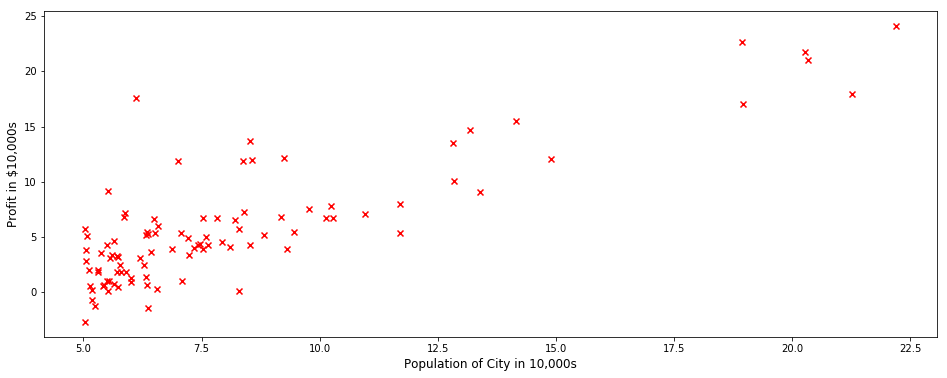

In [5]:
fig, ax = plt.subplots()
ax.set_xlabel('Population of City in 10,000s', size=12)
ax.set_ylabel('Profit in $10,000s', size=12)
ax.scatter(X, y, marker='x', c='red')
plt.show()

**Closed form solution**

In [6]:
def linreg(X, y):
    return np.dot(
        np.linalg.inv(np.dot(X.T, X)),
        np.dot(X.T, y)
    )

In [8]:
def normalize(X):
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    X_norm = (X - X_mean) / X_std
    return X_norm

In [9]:
X_cf = np.insert(normalize(X), 0, values=1, axis=1)
print('closed-form solution:', linreg(X_cf, y).flatten())

closed-form solution: [ 5.83913505  4.59304113]


**Solution by gradient descent**

In [14]:
def linreg_gd_cost(X, y, theta):
    return np.sum(np.square((np.dot(X, theta) - y))) / (2 * y.shape[0])

In [10]:
def linreg_gd(X, y, theta, learning_rate, num_iterations):
    num_points = X.shape[0]
    costs = []
    for i in range(num_iterations):
        error = np.dot(X, theta) - y
        cost = np.sum(np.square(error)) / (2 * num_points) 
        cost_gradient = np.dot(X.T, error) / num_points
        # update parameters
        theta = theta - learning_rate * cost_gradient
        costs.append(cost)
    return theta, costs

In [11]:
X_gd = np.insert(normalize(X), 0, values=1, axis=1)

initial_theta = np.zeros((X_gd.shape[1], 1))
alpha = 0.05
num_iters = 200

linreg_gd_thetas, linreg_gd_costs = linreg_gd(X_gd, y, initial_theta, alpha, num_iters)

print('gradient descent solution:', linreg_gd_thetas.flatten())

gradient descent solution: [ 5.83893037  4.59288014]


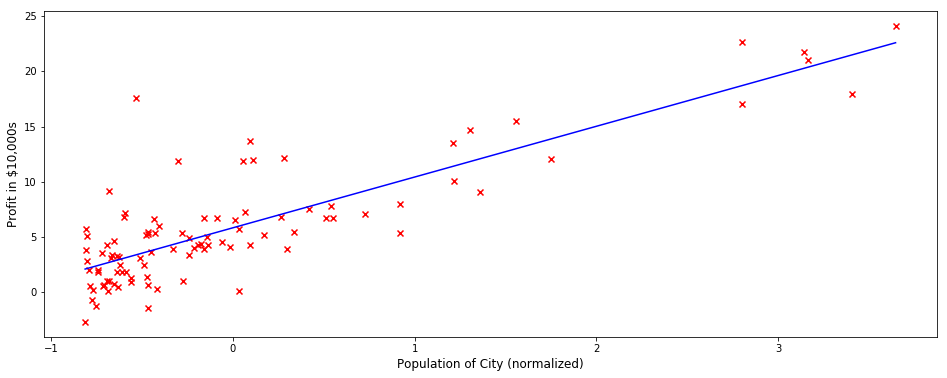

In [12]:
fig, ax = plt.subplots()

ax.set_xlabel('Population of City (normalized)', size=12)
ax.set_ylabel('Profit in $10,000s', size=12)


x_min = np.min(X_gd[:, 1])
x_max = np.max(X_gd[:, 1])
y_min = linreg_gd_thetas[0] + linreg_gd_thetas[1] * x_min
y_max = np.max(np.dot(X_gd, linreg_gd_thetas))

ax.scatter(X_gd[:, 1], y, marker='x', c='red')
ax.plot([x_min, x_max], [y_min, y_max], c='b')    

plt.show()

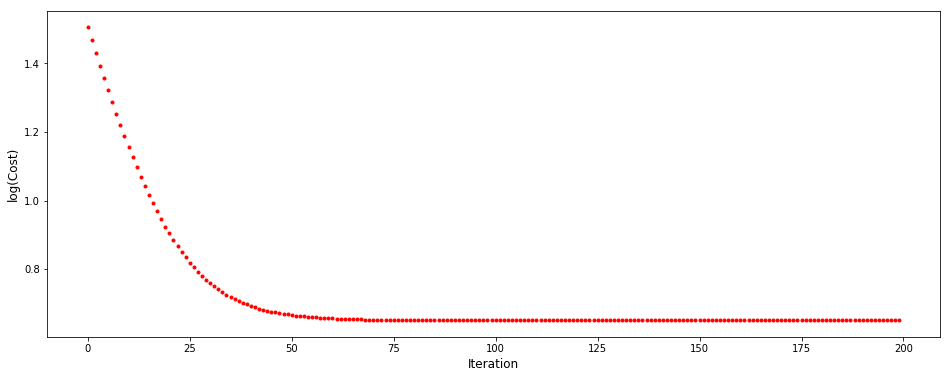

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xlabel('Iteration', size=12)
ax.set_ylabel('log(Cost)', size=12)

plt.scatter(range(len(linreg_gd_costs)), np.log10(linreg_gd_costs), marker='.', color='red')
plt.show()

In [16]:
x_p = np.outer(np.linspace(-30, 30, 20), np.ones(20))
y_p = x_p.copy().T
z_p = np.zeros(x_p.shape)

for i in range(x_p.shape[0]):
    for j in range(x_p.shape[1]):
        t = np.array([x_p[i, j], y_p[i, j]])
        t = t[:, np.newaxis]
        z_p[i, j] = linreg_gd_cost(X_gd, y, t)

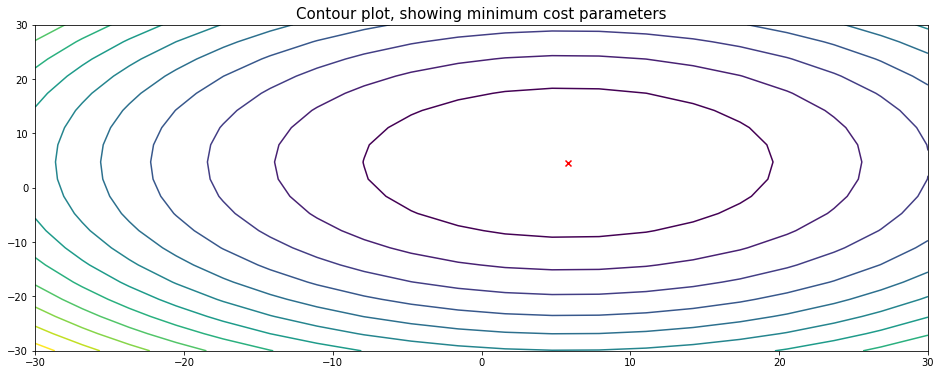

In [17]:
fig, ax = plt.subplots()
ax.contour(x_p, y_p, z_p, 12)
ax.scatter(linreg_gd_thetas[0], linreg_gd_thetas[1], marker='x', c='red')
plt.title('Contour plot, showing minimum cost parameters', size=15)
plt.show()